In [1]:
 import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns


In [2]:
!unzip /content/drive/MyDrive/public_dataset/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: datset/T/Normal/Normal-1394.png  
  inflating: datset/T/Normal/Normal-1395.png  
  inflating: datset/T/Normal/Normal-1396.png  
  inflating: datset/T/Normal/Normal-1397.png  
  inflating: datset/T/Normal/Normal-1398.png  
  inflating: datset/T/Normal/Normal-1399.png  
  inflating: datset/T/Normal/Normal-1400.png  
  inflating: datset/T/Normal/Normal-1401.png  
  inflating: datset/T/Normal/Normal-1402.png  
  inflating: datset/T/Normal/Normal-1403.png  
  inflating: datset/T/Normal/Normal-1404.png  
  inflating: datset/T/Normal/Normal-1405.png  
  inflating: datset/T/Normal/Normal-1406.png  
  inflating: datset/T/Normal/Normal-1407.png  
  inflating: datset/T/Normal/Normal-1408.png  
  inflating: datset/T/Normal/Normal-1409.png  
  inflating: datset/T/Normal/Normal-1410.png  
  inflating: datset/T/Normal/Normal-1411.png  
  inflating: datset/T/Normal/Normal-1412.png  
  inflating: datset/T/Normal/Normal-1413.png  
  inflati

In [3]:
train_path="datset/T"
val_path="datset/V"

In [4]:
for directory_path in glob.glob("datset/T/*"):
    label = directory_path.split("\\")[-1]
    print(label)

datset/T/pneumonia
datset/T/covid+
datset/T/Normal


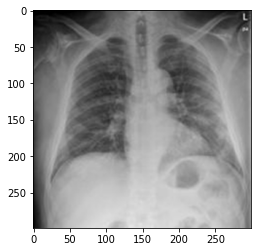

In [5]:
import glob
import cv2
import matplotlib.pyplot as plt
file="datset/V/covid+/COVID-520.png"
image= cv2.imread(file)
plt.imshow(image)

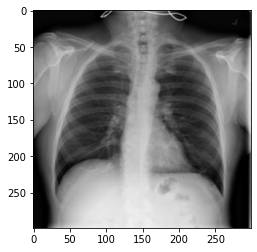

In [6]:
file="datset/V/Normal/Normal-19.png"
image= cv2.imread(file)
plt.imshow(image)

In [7]:
import os

list = os.listdir('datset/T/covid+') # dir is your directory path
TP= len(list)
print (TP)

3076


In [8]:
list = os.listdir('datset/T/Normal') # dir is your directory path
TN= len(list)
print (TN)

2964


In [9]:
trainingdata=TP+TN;

In [10]:
list = os.listdir('datset/V/covid+') # dir is your directory path
TestP= len(list)
print (TestP)
list = os.listdir('datset/V/Normal') # dir is your directory path
TestN= len(list)
print (TestN)
testdata=TestP+TestN;

540
540


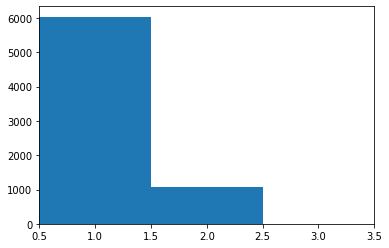

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
s = fig.add_subplot(111)
s.bar([1, 2], [trainingdata,testdata], width=1)
s.set_xlim(0.5, 3.5)
fig.savefig('t.png')

In [12]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2  import preprocess_input

In [13]:

IMAGE_SIZE = [224, 224]
inceptionresnet = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


219070464/219055592 [==============================] - 1s 0us/step


In [14]:
inceptionresnet.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [15]:
for layer in inceptionresnet.layers:
  layer.trainable = False

In [16]:

x = Flatten()(inceptionresnet.output)
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=inceptionresnet.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [17]:
from keras import optimizers


adam = optimizers.Adam(0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [18]:

# Image Data Augmentation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [19]:

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [20]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 40,
                                                 class_mode = 'categorical')

Found 7253 images belonging to 3 classes.


In [21]:
test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 40,
                                            class_mode = 'categorical')

Found 1212 images belonging to 3 classes.


In [22]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='inceptionv2.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  validation_steps=32,
  callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
182/182 - 250s - loss: 0.6411 - accuracy: 0.7455 - val_loss: 0.3935 - val_accuracy: 0.8432

Epoch 00001: val_loss improved from inf to 0.39347, saving model to inceptionv2.h5
Epoch 2/10
182/182 - 117s - loss: 0.4230 - accuracy: 0.8297
Epoch 3/10
182/182 - 117s - loss: 0.4030 - accuracy: 0.8432
Epoch 4/10
182/182 - 118s - loss: 0.3856 - accuracy: 0.8461
Epoch 5/10
182/182 - 118s - loss: 0.3617 - accuracy: 0.8603
Epoch 6/10
182/182 - 117s - loss: 0.3520 - accuracy: 0.8624
Epoch 7/10
182/182 - 117s - loss: 0.3383 - accuracy: 0.8678
Epoch 8/10
182/182 - 117s - loss: 0.3352 - accuracy: 0.8667
Epoch 9/10
182/182 - 117s - loss: 0.3186 - accuracy: 0.8744
Epoch 10/10
182/182 - 117s - loss: 0.3107 - accuracy: 0.8784
Training completed in time:  0:21:46.795718


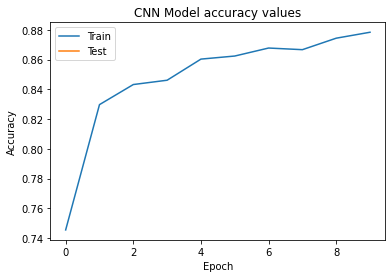

In [23]:

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

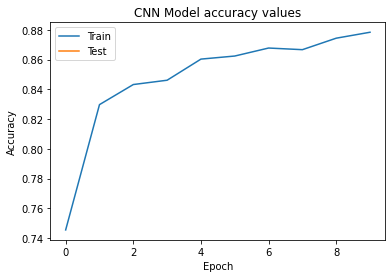

In [24]:

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
import matplotlib.pyplot as plt
import itertools 

#by https://sites.google.com/view/amarnath-r/keras-deep-learning-image-classification-a-simple-example

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(5,5))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [26]:
classes=["COVID",  "Normal","pneumonia"]

In [27]:
inceptionresnetv2nmodel=model

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix 
Normalized confusion matrix
Confusion matrix, without normalization


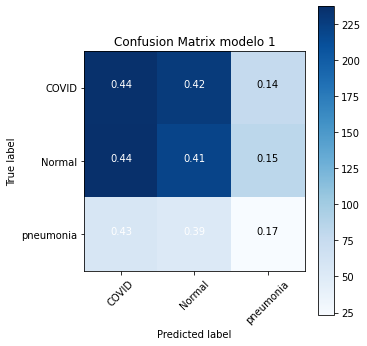

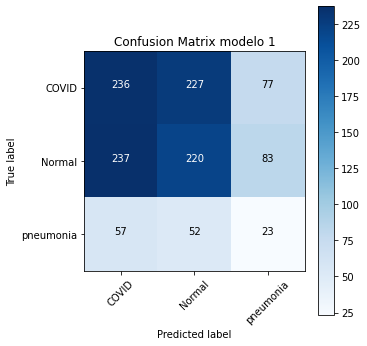

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred =  inceptionresnetv2nmodel.predict_generator(test_set)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix ')

cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, classes, title='Confusion Matrix modelo 1')
plot_confusion_matrix(cm, classes,False, title='Confusion Matrix modelo 1')

In [30]:
from sklearn.metrics import classification_report

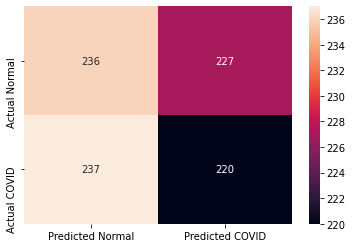

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test_set.classes, y_pred, labels=[0, 1]),index=["Actual Normal", "Actual COVID"],
columns=["Predicted Normal", "Predicted COVID"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")